In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 카카오 맵 API 불러오기 위해
import requests
import json

# 상관분석
from sklearn import preprocessing
from scipy.stats import chi2_contingency

## 데이터셋 불러오기

In [7]:
yeongdeung_cbb = pd.read_csv('data/쓰레기통_위경도/영등포구_담배꽁초쓰레기통_위경도.csv')
print(yeongdeung_cbb.shape)
yeongdeung_cbb.head()

(204, 7)


,address_name,경도,위도,주소,동명,비고,시군구명
0,서울 영등포구 당산로32길 1-6,126.897267,37.526741,서울특별시 영등포구 당산로32길 1-6,당산1동,NaN,영등포구
1,서울 영등포구 국회대로36길 7-3,126.898124,37.526561,서울특별시 영등포구 국회대로36길 7-3,당산1동,NaN,영등포구
2,서울 영등포구 당산로32길 5,126.897474,37.526476,서울특별시 영등포구 당산로32길 5 이차돌,당산1동,NaN,영등포구
3,서울 영등포구 국회대로34길 4,126.897452,37.527212,서울특별시 영등포구 국회대로34길 4 가화,당산1동,NaN,영등포구
4,서울 영등포구 국회대로34길 3,126.897658,37.527155,서울특별시 영등포구 국회대로34길 3,당산1동,NaN,영등포구


In [2]:
yeongdeung_c = pd.read_csv('data/서울특별시 영등포구_흡연구역(실외) 현황_20220429.csv', encoding='cp949')
print(yeongdeung_c.shape)
yeongdeung_c.head()

(68, 11)


,자치구,시설 구분,시설형태,설치 위치,위도,경도,규모(제곱미터),설치일,설치 주체,관리여부,관리
0,영등포구,한강프리젠,완전개방형,실외,37.5398,126.8937,10.0,NaN,건물관리자,여,건물관리자
1,영등포구,프리가,완전개방형,실외,37.5125,126.9238,10.0,NaN,건물관리자,여,건물관리자
2,영등포구,에이스 테크노타워,완전개방형,실외,37.5150,126.8959,60.0,NaN,건물관리자,여,건물관리자
3,영등포구,고려빌딩,개방형,실외,37.5193,126.9314,330.0,NaN,건물관리자,여,건물관리자
4,영등포구,리버타워오피스텔,개방형,실외,37.5195,126.9386,17.0,NaN,건물관리자,여,건물관리자


## 주소 변환 테스트

In [3]:
# lng = '126.898124'
# lat = '37.526561'
# url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?x="+lng+"&y="+lat
# headers = {"Authorization": 'KakaoAK 9b47700a217b794a8878d97b26b723be'}
# results = requests.get(url, headers=headers).json()['documents']

# address = results[0]
# road_address = address['road_address']
# name = road_address['address_name']
# name

'서울특별시 영등포구 국회대로36길 7-3'

In [4]:
# # 위경도 좌표로 주소 매칭하는 함수
# def GetAddress(lng, lat):
    
#     url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?x="+lng+"&y="+lat
#     headers = {"Authorization": 'KakaoAK 9b47700a217b794a8878d97b26b723be'}
#     results = requests.get(url, headers=headers).json()['documents']
    
#     address = results[0]
#     road_address = address['road_address']
#     name = road_address['address_name']

#     return name

In [3]:
# 위경도 좌표로 주소 매칭하는 함수
def GetAddress(lng, lat):
    
    url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?x="+lng+"&y="+lat
    headers = {"Authorization": 'KakaoAK 9b47700a217b794a8878d97b26b723be'}
    results = requests.get(url, headers=headers).json()['documents']
    
    address = results[0]
    name = address['address']['address_name']

    return name

In [6]:
# lng = '126.8937'
# lat = '37.5398'
# url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?x="+lng+"&y="+lat
# headers = {"Authorization": 'KakaoAK 9b47700a217b794a8878d97b26b723be'}
# results = requests.get(url, headers=headers).json()['documents']

# address = results[0]
# name = address['address']['address_name']
# name

'서울 영등포구 양평동5가 94'

In [9]:
# # 45번 인덱스 값 에러남
# lng = '126.9042'
# lat = '32.5273'
# url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?x="+lng+"&y="+lat
# headers = {"Authorization": 'KakaoAK 9b47700a217b794a8878d97b26b723be'}
# results = requests.get(url, headers=headers).json()['documents']

# results
# # address = results[0]
# # name = address['address']['address_name']
# # name

[]

In [4]:
getaddresslist = []
for i in range(0,68):
    if i == 45:
        getaddresslist.append(0) # 에러 나는 주소
    else:
        x = yeongdeung_c['경도'][i]
        y = yeongdeung_c['위도'][i]
        print(f'{i}: '+GetAddress(str(x), str(y)))
        getaddresslist.append(GetAddress(str(x), str(y)))   

0: 서울 영등포구 양평동5가 94
1: 서울 영등포구 신길동 1329
2: 서울 영등포구 문래동3가 55-7
3: 서울 영등포구 여의도동 44-14
4: 서울 영등포구 여의도동 61-5
5: 서울 영등포구 여의도동 39
6: 서울 영등포구 여의도동 44-35
7: 서울 영등포구 도림동 821
8: 서울 영등포구 당산동5가 8
9: 서울 영등포구 여의도동 17-1
10: 서울 영등포구 대림동 682
11: 서울 영등포구 당산동3가 80-1
12: 서울 영등포구 여의도동 44-21
13: 서울 영등포구 여의도동 24-4
14: 서울 영등포구 여의도동 45-2
15: 서울 영등포구 양평동5가 1-1
16: 서울 영등포구 여의도동 20
17: 서울 영등포구 여의도동 13-5
18: 서울 영등포구 영등포동2가 29-69
19: 서울 영등포구 도림동 176-9
20: 서울 영등포구 양평동3가 16
21: 서울 영등포구 여의도동 44-35
22: 서울 영등포구 문래동6가 24-1
23: 서울 영등포구 문래동3가 55-20
24: 서울 영등포구 당산동4가 80
25: 서울 영등포구 양평동4가 80
26: 서울 영등포구 영등포동7가 94-57
27: 서울 영등포구 당산동2가 37
28: 서울 영등포구 여의도동 4-3
29: 서울 영등포구 문래동5가 2
30: 서울 영등포구 여의도동 44-24
31: 서울 영등포구 여의도동 35-2
32: 서울 영등포구 문래동1가 39
33: 서울 영등포구 양평동5가 39
34: 서울 영등포구 당산동4가 74-2
35: 서울 영등포구 도림동 266-2
36: 서울 영등포구 당산동5가 8
37: 서울 영등포구 문래동6가 8
38: 서울 영등포구 양평동3가 13
39: 서울 영등포구 당산동5가 11-34
40: 서울 영등포구 여의도동 11-1
41: 서울 영등포구 문래동3가 46
42: 서울 영등포구 문래동3가 82-25
43: 서울 영등포구 문래동3가 58-31
44: 서울 영등포구 양평동5가 106-1
46: 서울 영등포구 양평동3가 17-1

In [5]:
len(getaddresslist)

68

In [6]:
yeongdeung_c['주소']=getaddresslist
yeongdeung_c.head()

,자치구,시설 구분,시설형태,설치 위치,위도,경도,규모(제곱미터),설치일,설치 주체,관리여부,관리,주소
0,영등포구,한강프리젠,완전개방형,실외,37.5398,126.8937,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 양평동5가 94
1,영등포구,프리가,완전개방형,실외,37.5125,126.9238,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 신길동 1329
2,영등포구,에이스 테크노타워,완전개방형,실외,37.5150,126.8959,60.0,NaN,건물관리자,여,건물관리자,서울 영등포구 문래동3가 55-7
3,영등포구,고려빌딩,개방형,실외,37.5193,126.9314,330.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 44-14
4,영등포구,리버타워오피스텔,개방형,실외,37.5195,126.9386,17.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 61-5


## 지번주소를 도로명으로

In [8]:
# 위경도 좌표로 주소 매칭하는 함수
def GetDoroAddress(jibeon):
    
    url = "https://dapi.kakao.com/v2/local/search/address.json?query={}".format(jibeon)
    headers = {"Authorization": 'KakaoAK 9b47700a217b794a8878d97b26b723be'}
    results = requests.get(url, headers=headers).json()['documents']
    
    address = results[0]
    name = address['road_address']['address_name']

    return name

In [18]:
jibeon = yeongdeung_c['주소'][0]
url = "https://dapi.kakao.com/v2/local/search/address.json?query={}".format(jibeon)
headers = {"Authorization": 'KakaoAK 9b47700a217b794a8878d97b26b723be'}
results = requests.get(url, headers=headers).json()['documents']

address = results[0]
address['road_address']['address_name']
# name = address['address']['address_name']
# name

'서울 영등포구 양평로24길 16'

In [19]:
yeongdeung_c['주소'][5]

'서울 영등포구 여의도동 39'

In [21]:
jibeon = yeongdeung_c['주소'][5]
url = "https://dapi.kakao.com/v2/local/search/address.json?query={}".format(jibeon)
headers = {"Authorization": 'KakaoAK 9b47700a217b794a8878d97b26b723be'}
results = requests.get(url, headers=headers).json()['documents']

address = results[0]
address
# address['road_address']['address_name']
# name = address['address']['address_name']
# name

{'address': {'address_name': '서울 영등포구 여의도동 39',
  'b_code': '1156011000',
  'h_code': '1156054000',
  'main_address_no': '39',
  'mountain_yn': 'N',
  'region_1depth_name': '서울',
  'region_2depth_name': '영등포구',
  'region_3depth_h_name': '여의동',
  'region_3depth_name': '여의도동',
  'sub_address_no': '',
  'x': '126.919386331457',
  'y': '37.5187212849421'},
 'address_name': '서울 영등포구 여의도동 39',
 'address_type': 'REGION_ADDR',
 'road_address': None,
 'x': '126.919386331457',
 'y': '37.5187212849421'}

In [22]:
yeongdeung_c['주소'][28]

'서울 영등포구 여의도동 4-3'

In [24]:
jibeon = yeongdeung_c['주소'][28]
url = "https://dapi.kakao.com/v2/local/search/address.json?query={}".format(jibeon)
headers = {"Authorization": 'KakaoAK 9b47700a217b794a8878d97b26b723be'}
results = requests.get(url, headers=headers).json()['documents']

address = results[0]
address
# address['road_address']['address_name']
# name = address['address']['address_name']
# name

{'address': {'address_name': '서울 영등포구 여의도동 4-3',
  'b_code': '1156011000',
  'h_code': '1156054000',
  'main_address_no': '4',
  'mountain_yn': 'N',
  'region_1depth_name': '서울',
  'region_2depth_name': '영등포구',
  'region_3depth_h_name': '여의동',
  'region_3depth_name': '여의도동',
  'sub_address_no': '3',
  'x': '126.930912935984',
  'y': '37.5204287821912'},
 'address_name': '서울 영등포구 여의도동 4-3',
 'address_type': 'REGION_ADDR',
 'road_address': None,
 'x': '126.930912935984',
 'y': '37.5204287821912'}

In [9]:
errorcase = [5, 28, 45, 57]

In [10]:
dorolist = []
for i in range(0, 68):
    if i in errorcase:
        dorolist.append(0)
    else:
        jibeon = yeongdeung_c['주소'][i]
        print(f'{i}: '+GetDoroAddress(jibeon))
        dorolist.append(GetDoroAddress(jibeon))

0: 서울 영등포구 양평로24길 16
1: 서울 영등포구 영등포로 414
2: 서울 영등포구 당산로2길 12
3: 서울 영등포구 여의대방로 383
4: 서울 영등포구 63로 36
6: 서울 영등포구 여의대방로 379
7: 서울 영등포구 도영로 66
8: 서울 영등포구 당산로 203
9: 서울 영등포구 국회대로 750
10: 서울 영등포구 가마산로 356
11: 서울 영등포구 국회대로36길 17
12: 서울 영등포구 국제금융로8길 19
13: 서울 영등포구 여의나루로 77
14: 서울 영등포구 의사당대로 143
15: 서울 영등포구 양평로21길 26
16: 서울 영등포구 여의대로 128
17: 서울 영등포구 국회대로76길 18
18: 서울 영등포구 국회대로54길 35
19: 서울 영등포구 도영로 50
20: 서울 영등포구 양산로 43
21: 서울 영등포구 여의대방로 379
22: 서울 영등포구 선유로13길 25
23: 서울 영등포구 경인로 775
24: 서울 영등포구 당산로41길 11
25: 서울 영등포구 선유로49길 23
26: 서울 영등포구 국회대로55길 4
27: 서울 영등포구 영등포로 103
29: 서울 영등포구 선유로 27
30: 서울 영등포구 여의대방로65길 20
31: 서울 영등포구 국제금융로6길 30
32: 서울 영등포구 경인로82길 3-4
33: 서울 영등포구 양평로 149
34: 서울 영등포구 당산로 171
35: 서울 영등포구 도신로15길 37
36: 서울 영등포구 당산로 203
37: 서울 영등포구 선유로 71
38: 서울 영등포구 양산로 57-5
39: 서울 영등포구 당산로44길 3
40: 서울 영등포구 국회대로76가길 11
41: 서울 영등포구 문래북로 116
42: 서울 영등포구 문래로 83
43: 서울 영등포구 도림로128길 15-1
44: 서울 영등포구 양평로22길 21
46: 서울 영등포구 양산로7길 3
47: 서울 영등포구 영등포로 150
48: 서울 영등포구 국제금융로 78
49: 서울 영등포구 국회대로72길 22
50: 서울

In [11]:
len(dorolist)

68

In [12]:
yeongdeung_c['주소변환']=dorolist
yeongdeung_c.head()

,자치구,시설 구분,시설형태,설치 위치,위도,경도,규모(제곱미터),설치일,설치 주체,관리여부,관리,주소,주소변환
0,영등포구,한강프리젠,완전개방형,실외,37.5398,126.8937,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 양평동5가 94,서울 영등포구 양평로24길 16
1,영등포구,프리가,완전개방형,실외,37.5125,126.9238,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 신길동 1329,서울 영등포구 영등포로 414
2,영등포구,에이스 테크노타워,완전개방형,실외,37.5150,126.8959,60.0,NaN,건물관리자,여,건물관리자,서울 영등포구 문래동3가 55-7,서울 영등포구 당산로2길 12
3,영등포구,고려빌딩,개방형,실외,37.5193,126.9314,330.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 44-14,서울 영등포구 여의대방로 383
4,영등포구,리버타워오피스텔,개방형,실외,37.5195,126.9386,17.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 61-5,서울 영등포구 63로 36


## 쓰레기통 도로명만 추출

In [44]:
yeongdeung_cbb.head()

,address_name,경도,위도,주소,동명,비고,시군구명
0,서울 영등포구 당산로32길 1-6,126.897267,37.526741,서울특별시 영등포구 당산로32길 1-6,당산1동,NaN,영등포구
1,서울 영등포구 국회대로36길 7-3,126.898124,37.526561,서울특별시 영등포구 국회대로36길 7-3,당산1동,NaN,영등포구
2,서울 영등포구 당산로32길 5,126.897474,37.526476,서울특별시 영등포구 당산로32길 5 이차돌,당산1동,NaN,영등포구
3,서울 영등포구 국회대로34길 4,126.897452,37.527212,서울특별시 영등포구 국회대로34길 4 가화,당산1동,NaN,영등포구
4,서울 영등포구 국회대로34길 3,126.897658,37.527155,서울특별시 영등포구 국회대로34길 3,당산1동,NaN,영등포구


In [45]:
a = yeongdeung_cbb['address_name'].apply(lambda x:x.split(" "))
a

0       [서울, 영등포구, 당산로32길, 1-6]
1      [서울, 영등포구, 국회대로36길, 7-3]
2         [서울, 영등포구, 당산로32길, 5]
3        [서울, 영등포구, 국회대로34길, 4]
4        [서울, 영등포구, 국회대로34길, 3]
                 ...           
199     [서울, 영등포구, 경인로114가길, 4]
200       [서울, 영등포구, 영신로15길, 7]
201       [서울, 영등포구, 영신로15길, 7]
202          [서울, 영등포구, 영신로17길]
203      [서울, 영등포구, 도신로29길, 28]
Name: address_name, Length: 204, dtype: object

In [46]:
for i in range(len(a)):
    a[i] = a[i][2]

In [47]:
yeongdeung_cbb['address_name']=a

In [49]:
b = yeongdeung_cbb['address_name'].str.split('로')
b

0        [당산, 32길]
1       [국회대, 36길]
2        [당산, 32길]
3       [국회대, 34길]
4       [국회대, 34길]
          ...     
199    [경인, 114가길]
200      [영신, 15길]
201      [영신, 15길]
202      [영신, 17길]
203      [도신, 29길]
Name: address_name, Length: 204, dtype: object

In [50]:
for i in range(len(b)):
    b[i] = b[i][0] + '로'

In [52]:
yeongdeung_cbb['address_name'] = b

In [53]:
yeongdeung_cbb.head()

,address_name,경도,위도,주소,동명,비고,시군구명
0,당산로,126.897267,37.526741,서울특별시 영등포구 당산로32길 1-6,당산1동,NaN,영등포구
1,국회대로,126.898124,37.526561,서울특별시 영등포구 국회대로36길 7-3,당산1동,NaN,영등포구
2,당산로,126.897474,37.526476,서울특별시 영등포구 당산로32길 5 이차돌,당산1동,NaN,영등포구
3,국회대로,126.897452,37.527212,서울특별시 영등포구 국회대로34길 4 가화,당산1동,NaN,영등포구
4,국회대로,126.897658,37.527155,서울특별시 영등포구 국회대로34길 3,당산1동,NaN,영등포구


## 흡연구역 도로명만 추출

In [57]:
yeongdeung_c.drop(yeongdeung_c[yeongdeung_c['주소변환']==0].index, inplace=True)

In [60]:
yeongdeung_c = yeongdeung_c.reset_index()

In [63]:
yeongdeung_c = yeongdeung_c.drop(columns={'index'})
yeongdeung_c.head()

,자치구,시설 구분,시설형태,설치 위치,위도,경도,규모(제곱미터),설치일,설치 주체,관리여부,관리,주소,주소변환
0,영등포구,한강프리젠,완전개방형,실외,37.5398,126.8937,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 양평동5가 94,서울 영등포구 양평로24길 16
1,영등포구,프리가,완전개방형,실외,37.5125,126.9238,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 신길동 1329,서울 영등포구 영등포로 414
2,영등포구,에이스 테크노타워,완전개방형,실외,37.5150,126.8959,60.0,NaN,건물관리자,여,건물관리자,서울 영등포구 문래동3가 55-7,서울 영등포구 당산로2길 12
3,영등포구,고려빌딩,개방형,실외,37.5193,126.9314,330.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 44-14,서울 영등포구 여의대방로 383
4,영등포구,리버타워오피스텔,개방형,실외,37.5195,126.9386,17.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 61-5,서울 영등포구 63로 36


In [64]:
a = []
for i in range(0, 64):
    print(f'{i}', yeongdeung_c['주소변환'][i].split(' '))
    a.append(yeongdeung_c['주소변환'][i].split(' '))

0 ['서울', '영등포구', '양평로24길', '16']
1 ['서울', '영등포구', '영등포로', '414']
2 ['서울', '영등포구', '당산로2길', '12']
3 ['서울', '영등포구', '여의대방로', '383']
4 ['서울', '영등포구', '63로', '36']
5 ['서울', '영등포구', '여의대방로', '379']
6 ['서울', '영등포구', '도영로', '66']
7 ['서울', '영등포구', '당산로', '203']
8 ['서울', '영등포구', '국회대로', '750']
9 ['서울', '영등포구', '가마산로', '356']
10 ['서울', '영등포구', '국회대로36길', '17']
11 ['서울', '영등포구', '국제금융로8길', '19']
12 ['서울', '영등포구', '여의나루로', '77']
13 ['서울', '영등포구', '의사당대로', '143']
14 ['서울', '영등포구', '양평로21길', '26']
15 ['서울', '영등포구', '여의대로', '128']
16 ['서울', '영등포구', '국회대로76길', '18']
17 ['서울', '영등포구', '국회대로54길', '35']
18 ['서울', '영등포구', '도영로', '50']
19 ['서울', '영등포구', '양산로', '43']
20 ['서울', '영등포구', '여의대방로', '379']
21 ['서울', '영등포구', '선유로13길', '25']
22 ['서울', '영등포구', '경인로', '775']
23 ['서울', '영등포구', '당산로41길', '11']
24 ['서울', '영등포구', '선유로49길', '23']
25 ['서울', '영등포구', '국회대로55길', '4']
26 ['서울', '영등포구', '영등포로', '103']
27 ['서울', '영등포구', '선유로', '27']
28 ['서울', '영등포구', '여의대방로65길', '20']
29 ['서울', '영등포구', '국제금융로6길', '30']
30 ['서울',

In [65]:
for i in range(len(a)):
    a[i] = a[i][2]

In [66]:
for i in range(len(yeongdeung_c)):
    yeongdeung_c['주소변환'] = a

In [68]:
b = yeongdeung_c['주소변환'].str.split('로')
b

0      [양평, 24길]
1        [영등포, ]
2       [당산, 2길]
3       [여의대방, ]
4         [63, ]
         ...    
59       [국회대, ]
60    [국회대, 66길]
61      [의사당대, ]
62      [여의나루, ]
63    [여의나루, 4길]
Name: 주소변환, Length: 64, dtype: object

In [69]:
for i in range(len(b)):
    b[i] = b[i][0] + '로'

In [70]:
yeongdeung_c['주소변환']=b

In [71]:
yeongdeung_c.head()

,자치구,시설 구분,시설형태,설치 위치,위도,경도,규모(제곱미터),설치일,설치 주체,관리여부,관리,주소,주소변환
0,영등포구,한강프리젠,완전개방형,실외,37.5398,126.8937,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 양평동5가 94,양평로
1,영등포구,프리가,완전개방형,실외,37.5125,126.9238,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 신길동 1329,영등포로
2,영등포구,에이스 테크노타워,완전개방형,실외,37.5150,126.8959,60.0,NaN,건물관리자,여,건물관리자,서울 영등포구 문래동3가 55-7,당산로
3,영등포구,고려빌딩,개방형,실외,37.5193,126.9314,330.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 44-14,여의대방로
4,영등포구,리버타워오피스텔,개방형,실외,37.5195,126.9386,17.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 61-5,63로


## concat

In [72]:
yeongdeung_c_m = yeongdeung_c[['위도', '경도', '주소변환']]
yeongdeung_c_m.head()

,위도,경도,주소변환
0,37.5398,126.8937,양평로
1,37.5125,126.9238,영등포로
2,37.5150,126.8959,당산로
3,37.5193,126.9314,여의대방로
4,37.5195,126.9386,63로


In [74]:
yeongdeung_cbb_m = yeongdeung_cbb[['위도', '경도', 'address_name']]
yeongdeung_cbb_m.head()

,위도,경도,address_name
0,37.526741,126.897267,당산로
1,37.526561,126.898124,국회대로
2,37.526476,126.897474,당산로
3,37.527212,126.897452,국회대로
4,37.527155,126.897658,국회대로


In [75]:
yeongdeung_m = pd.concat([yeongdeung_cbb_m, yeongdeung_c_m], axis=1)
yeongdeung_m

,위도,경도,address_name,위도,경도,주소변환
0,37.526741,126.897267,당산로,37.5398,126.8937,양평로
1,37.526561,126.898124,국회대로,37.5125,126.9238,영등포로
2,37.526476,126.897474,당산로,37.5150,126.8959,당산로
3,37.527212,126.897452,국회대로,37.5193,126.9314,여의대방로
4,37.527155,126.897658,국회대로,37.5195,126.9386,63로
...,...,...,...,...,...,...
199,37.518140,126.914000,경인로,NaN,NaN,NaN
200,37.513710,126.907614,영신로,NaN,NaN,NaN
201,37.513710,126.907614,영신로,NaN,NaN,NaN
202,37.513869,126.907248,영신로,NaN,NaN,NaN


In [76]:
yeongdeung_m.columns = ['쓰레기통위도', '쓰레기통경도', '쓰레기통', '흡연구역위도', '흡연구역경도', '흡연구역']
yeongdeung_m.head()

,쓰레기통위도,쓰레기통경도,쓰레기통,흡연구역위도,흡연구역경도,흡연구역
0,37.526741,126.897267,당산로,37.5398,126.8937,양평로
1,37.526561,126.898124,국회대로,37.5125,126.9238,영등포로
2,37.526476,126.897474,당산로,37.5150,126.8959,당산로
3,37.527212,126.897452,국회대로,37.5193,126.9314,여의대방로
4,37.527155,126.897658,국회대로,37.5195,126.9386,63로


In [82]:
yeongdeung_m

,쓰레기통위도,쓰레기통경도,쓰레기통,흡연구역위도,흡연구역경도,흡연구역
0,37.526741,126.897267,당산로,37.5398,126.8937,양평로
1,37.526561,126.898124,국회대로,37.5125,126.9238,영등포로
2,37.526476,126.897474,당산로,37.5150,126.8959,당산로
3,37.527212,126.897452,국회대로,37.5193,126.9314,여의대방로
4,37.527155,126.897658,국회대로,37.5195,126.9386,63로
...,...,...,...,...,...,...
199,37.518140,126.914000,경인로,NaN,NaN,NaN
200,37.513710,126.907614,영신로,NaN,NaN,NaN
201,37.513710,126.907614,영신로,NaN,NaN,NaN
202,37.513869,126.907248,영신로,NaN,NaN,NaN


## 검정

In [101]:
df_crosstab = pd.crosstab(yeongdeung_m['쓰레기통'], yeongdeung_m['흡연구역'])
df_crosstab = pd.pivot_table(yeongdeung_m, index='쓰레기통', columns='흡연구역')
df_crosstab

쓰레기통경도                                                              \
흡연구역          63로        가마산로         경인로       국제금융로        국회대로         당산로   
쓰레기통                                                                            
국회대로   126.897658         NaN         NaN         NaN         NaN         NaN   
당산로           NaN  126.896451  126.896675  126.901767  126.900619  126.897474   
대림로           NaN         NaN  126.903016  126.903906  126.904726         NaN   
도림로           NaN         NaN         NaN         NaN         NaN         NaN   
디지털로          NaN         NaN         NaN  126.902738  126.903045  126.906470   
버드나루로         NaN         NaN         NaN         NaN         NaN  126.909109   
시흥대로          NaN         NaN         NaN         NaN  126.906860         NaN   
신길로           NaN         NaN         NaN         NaN  126.908021  126.908021   
양산로           NaN         NaN         NaN         NaN  126.897405  126.897577   
양평로           NaN         NaN         NaN  126.900525  126.900670         NaN   

                                                     ...   흡연구역위도            \
흡연구역         도림로         도신로        도영로         문래로  ...     선유서로       양산로   
쓰레기통                                                 ...                      
국회대로         NaN         NaN        NaN         NaN  ...      NaN       NaN   
당산로          NaN         NaN  126.90117         NaN  ...      NaN  37.52550   
대림로          NaN         NaN        NaN         NaN  ...  37.5252  37.52540   
도림로          NaN  126.901309        NaN         NaN  ...      NaN       NaN   
디지털로   126.90421         NaN        NaN  126.904044  ...      NaN  37.52545   
버드나루로        NaN         NaN        NaN         NaN  ...      NaN       NaN   
시흥대로         NaN         NaN        NaN         NaN  ...      NaN       NaN   
신길로          NaN         NaN        NaN         NaN  ...      NaN       NaN   
양산로          NaN         NaN        NaN         NaN  ...      NaN       NaN   
양평로          NaN         NaN        NaN         NaN  ...      NaN       NaN   

                                                                          \
흡연구역       양평로      여의나루로     여의대로      여의대방로     영등포로      영중로      은행로   
쓰레기통                                                                       
국회대로       NaN        NaN      NaN  37.519300  37.5125      NaN      NaN   
당산로    37.5378        NaN      NaN  37.519533  37.5220      NaN      NaN   
대림로    37.5388        NaN  37.5244        NaN      NaN      NaN  37.5289   
도림로        NaN        NaN      NaN        NaN      NaN      NaN      NaN   
디지털로   37.5396  37.522567      NaN        NaN  37.5202      NaN      NaN   
버드나루로      NaN        NaN      NaN        NaN      NaN      NaN      NaN   
시흥대로       NaN        NaN      NaN        NaN      NaN      NaN      NaN   
신길로        NaN        NaN      NaN        NaN      NaN  37.5238      NaN   
양산로        NaN        NaN      NaN        NaN      NaN      NaN      NaN   
양평로        NaN  37.523900  37.5277        NaN      NaN      NaN      NaN   

                  
흡연구역       의사당대로  
쓰레기통              
국회대로         NaN  
당산로    37.519000  
대림로    37.523467  
도림로          NaN  
디지털로         NaN  
버드나루로        NaN  
시흥대로   37.522500  
신길로          NaN  
양산로          NaN  
양평로          NaN  

[10 rows x 88 columns]

In [102]:
df_crosstab = df_crosstab.fillna(0)

In [103]:
rows = [row.to_list() for i, row in df_crosstab.iterrows()]
rows

[[126.897657998692,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  126.897451796745,
  126.898123773058,
  0.0,
  0.0,
  0.0,
  37.527154776227,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  37.5272118109642,
  37.5265607881376,
  0.0,
  0.0,
  0.0,
  126.9386,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  126.9314,
  126.9238,
  0.0,
  0.0,
  0.0,
  37.5195,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  37.5193,
  37.5125,
  0.0,
  0.0,
  0.0],
 [0.0,
  126.896451068581,
  126.896674782942,
  126.901767309797,
  126.90061850904134,
  126.897473959605,
  0.0,
  0.0,
  126.90116954315499,
  0.0,
  0.0,
  126.89962970266701,
  0.0,
  126.898129955018,
  126.900110558172,
  0.0,
  0.0,
  126.89848816127267,
  126.902645788

In [104]:
from scipy.stats import chi2_contingency

# 출력결과 : 카이제곱통계랑, p value, 자유도, 서로 독립일 때 기대(expected) 빈도의 row list
# p value 가 클수록 귀무가설 채택 (p_value>0.05)
# p value가 0에 가깝게 나왔기 때문에 귀무가설 기각 => 구분과 도로명은 독립이 아니다.
# H0 구분과 도로명은 독립이다.
# H1 구분과 도로명은 독립이 아니다.(연관이 있다.)
chi2_contingency(rows, correction=False)

(54696.41039712332,
 0.0,
 783,
 array([[  7.93178999,   7.93171455,  15.86385344,  31.72830404,
          55.52488881,  39.66084767,   7.93219954,   7.93201821,
           7.93200948,   7.93218916,   7.93237361,  15.86432292,
           7.93223482,  23.79640187,  23.7962358 ,  15.86395963,
          15.86415679,  15.86361898,  23.79602827,   7.93231869,
           7.93238559,  23.79679784,   2.34565015,   2.34535584,
           4.68898418,   9.37912843,  16.4116102 ,  11.72420744,
           2.34351717,   2.34366978,   2.34595216,   2.34350967,
           2.34367161,   4.68967652,   2.34334009,   7.03274617,
           7.03297566,   4.68953746,   4.68945334,   4.69150294,
           7.0352113 ,   2.34360991,   2.34350524,   7.03278062,
           7.93434909,   7.93184887,  15.86363523,  31.73487738,
          55.53105425,  39.65933811,   7.9316176 ,   7.93169886,
           7.93188012,   7.93138633,   7.93181762,  15.86256014,
           7.93084878,  23.79361519,  23.79451527,  15.867

In [105]:
# 크래머V - 명목변수간 상관관계 분석
# 0.6 이상이 되면 강한 연관관계가 있다고 본다.
x2 = chi2_contingency(rows, correction=False)[0]
n = np.sum(rows)
minDimension = min(np.array(rows).shape)-1

V = np.sqrt((x2/n) / minDimension)

print(V)

0.6205005391889398


## 검정2

In [85]:
data = yeongdeung_m[['쓰레기통', '흡연구역']]

In [128]:
data.tail()

,쓰레기통,흡연구역
199,경인로,NaN
200,영신로,NaN
201,영신로,NaN
202,영신로,NaN
203,도신로,NaN


In [86]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in data.columns:
    data_encoded[i] = label.fit_transform(data[i])
    
data_encoded.head()

,쓰레기통,흡연구역
0,4,14
1,2,18
2,4,5
3,2,17
4,2,0


In [122]:
df_crosstab = pd.crosstab(data_encoded['쓰레기통'], data_encoded['흡연구역'])
df_crosstab

흡연구역,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
쓰레기통,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,1,3,1,0,0,2,0,...,1,2,0,0,3,1,0,0,1,1
5,0,0,1,1,2,0,0,0,0,0,...,1,1,0,1,0,0,0,1,3,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,21
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [123]:
rows = [row.to_list() for i, row in df_crosstab.iterrows()]
rows

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 1, 3, 1, 0, 0, 2, 0, 0, 3, 0, 1, 2, 0, 0, 3, 1, 0, 0, 1, 1],
 [0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 3, 5],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4],
 [0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 3, 0, 0, 1, 0, 0, 0, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [124]:
chi2_contingency(rows, correction=False)

(485.0677705627706,
 0.9999701218613892,
 616,
 array([[1.96078431e-02, 1.96078431e-02, 3.92156863e-02, 7.84313725e-02,
         1.96078431e-01, 1.17647059e-01, 1.96078431e-02, 1.96078431e-02,
         3.92156863e-02, 1.96078431e-02, 1.96078431e-02, 7.84313725e-02,
         1.96078431e-02, 7.84313725e-02, 7.84313725e-02, 7.84313725e-02,
         3.92156863e-02, 7.84313725e-02, 5.88235294e-02, 1.96078431e-02,
         1.96078431e-02, 1.17647059e-01, 2.74509804e+00],
        [4.41176471e-02, 4.41176471e-02, 8.82352941e-02, 1.76470588e-01,
         4.41176471e-01, 2.64705882e-01, 4.41176471e-02, 4.41176471e-02,
         8.82352941e-02, 4.41176471e-02, 4.41176471e-02, 1.76470588e-01,
         4.41176471e-02, 1.76470588e-01, 1.76470588e-01, 1.76470588e-01,
         8.82352941e-02, 1.76470588e-01, 1.32352941e-01, 4.41176471e-02,
         4.41176471e-02, 2.64705882e-01, 6.17647059e+00],
        [2.45098039e-02, 2.45098039e-02, 4.90196078e-02, 9.80392157e-02,
         2.45098039e-01, 1.4705882

In [125]:
x2 = chi2_contingency(rows, correction=False)[0]
n = np.sum(rows)
minDimension = min(np.array(rows).shape)-1

V = np.sqrt((x2/n) / minDimension)

print(V)

0.32875683117916066


In [114]:
# 함수 정의 및 혼동행렬 생성
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    phi2 = stat / obs
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - (((k-1)*(r-1))/(obs-1)))
    rcorr = r - ((r-1)**2)/(obs-1)
    kcorr = k - ((k-1)**2)/(obs-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [115]:
rows = []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2])
        col.append(round(cramers, 2))
    rows.append(col)

In [116]:
cramers_results = np.array(rows)

In [117]:
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index = data_encoded.columns)
df

,쓰레기통,흡연구역
쓰레기통,1.0,0.0
흡연구역,0.0,1.0


# 밑은 삭제할거

## melt

In [46]:
yeongdeung_m.tail()

,쓰레기통위도,쓰레기통경도,쓰레기통,흡연구역위도,흡연구역경도,흡연구역,쓰레기통_1
199,37.518140,126.914000,서울특별시 영등포구 경인로114가길 4,NaN,NaN,NaN,경인로114가길
200,37.513710,126.907614,서울특별시 영등포구 영신로15길 7 현대기술학원 정문,NaN,NaN,NaN,영신로15길
201,37.513710,126.907614,서울특별시 영등포구 영신로15길 7 현대기술학원 후문,NaN,NaN,NaN,영신로15길
202,37.513869,126.907248,서울특별시 영등포구 영신로17길,NaN,NaN,NaN,영신로17길
203,37.511755,126.902326,서울특별시 영등포구 도신로29길 28,NaN,NaN,NaN,도신로29길


In [74]:
df_melt = yeongdeung_m[['쓰레기통','흡연구역']]
df_melt

,쓰레기통,흡연구역
0,서울특별시 영등포구 당산로32길 1-6,서울 영등포구 양평로24길 16
1,서울특별시 영등포구 국회대로36길 7-3,서울 영등포구 영등포로 414
2,서울특별시 영등포구 당산로32길 5 이차돌,서울 영등포구 당산로2길 12
3,서울특별시 영등포구 국회대로34길 4 가화,서울 영등포구 여의대방로 383
4,서울특별시 영등포구 국회대로34길 3,서울 영등포구 63로 36
...,...,...
199,서울특별시 영등포구 경인로114가길 4,NaN
200,서울특별시 영등포구 영신로15길 7 현대기술학원 정문,NaN
201,서울특별시 영등포구 영신로15길 7 현대기술학원 후문,NaN
202,서울특별시 영등포구 영신로17길,NaN


In [75]:
df_melt = pd.melt(df_melt, value_vars=['쓰레기통', '흡연구역'], var_name='구분', value_name='주소').dropna()
df_melt

,구분,주소
0,쓰레기통,서울특별시 영등포구 당산로32길 1-6
1,쓰레기통,서울특별시 영등포구 국회대로36길 7-3
2,쓰레기통,서울특별시 영등포구 당산로32길 5 이차돌
3,쓰레기통,서울특별시 영등포구 국회대로34길 4 가화
4,쓰레기통,서울특별시 영등포구 국회대로34길 3
...,...,...
267,흡연구역,서울 영등포구 국회대로 지하 758
268,흡연구역,서울 영등포구 국회대로66길 12-2
269,흡연구역,서울 영등포구 의사당대로 88
270,흡연구역,서울 영등포구 여의나루로 76


In [ ]:
# 0값들 에러... 삭제해주자
df_melt['주소'][209]

In [78]:
df_melt.drop(df_melt[df_melt['주소']==0].index, inplace=True)

In [81]:
df_melt = df_melt.reset_index()
df_melt

,index,구분,주소
0,0,쓰레기통,서울특별시 영등포구 당산로32길 1-6
1,1,쓰레기통,서울특별시 영등포구 국회대로36길 7-3
2,2,쓰레기통,서울특별시 영등포구 당산로32길 5 이차돌
3,3,쓰레기통,서울특별시 영등포구 국회대로34길 4 가화
4,4,쓰레기통,서울특별시 영등포구 국회대로34길 3
...,...,...,...
263,267,흡연구역,서울 영등포구 국회대로 지하 758
264,268,흡연구역,서울 영등포구 국회대로66길 12-2
265,269,흡연구역,서울 영등포구 의사당대로 88
266,270,흡연구역,서울 영등포구 여의나루로 76


In [82]:
df_melt = df_melt.drop(columns={'index'})

In [83]:
a = []
for i in range(len(df_melt)):
    print(f'{i}', df_melt['주소'][i].split(' '))
    a.append(df_melt['주소'][i].split(' '))

0 ['서울특별시', '영등포구', '당산로32길', '1-6']
1 ['서울특별시', '영등포구', '국회대로36길', '7-3']
2 ['서울특별시', '영등포구', '당산로32길', '5', '이차돌']
3 ['서울특별시', '영등포구', '국회대로34길', '4', '가화']
4 ['서울특별시', '영등포구', '국회대로34길', '3']
5 ['서울특별시', '영등포구', '당산로31길', '4']
6 ['서울특별시', '영등포구', '당산로38길', '14']
7 ['서울특별시', '영등포구', '양산로23길', '17']
8 ['서울특별시', '영등포구', '양산로23길', '11', '']
9 ['서울특별시', '영등포구', '당산로16길', '4']
10 ['서울특별시', '영등포구', '당산로32길', '9']
11 ['서울특별시', '영등포구', '양평로12길', '9', '한국능력개발직업전문학교']
12 ['서울특별시', '영등포구', '양평로12길', '13', '서울현대전문학교']
13 ['서울특별시', '영등포구', '당산로46길', '11', '강남부동산']
14 ['서울특별시', '영등포구', '당산로48길', '4', '송가네족발']
15 ['서울특별시', '영등포구', '양평로', '51', '오도시']
16 ['서울특별시', '영등포구', '양평로', '58(철거', '후', '동', '보관)']
17 ['서울특별시', '영등포구', '당산로45길', '2', '당산빨간쭈꾸미']
18 ['서울특별시', '영등포구', '당산로49길', '2']
19 ['서울특별시', '영등포구', '당산로160']
20 ['서울특별시', '영등포구', '당산로37길', '7']
21 ['서울특별시', '영등포구', '당산로36길', '12']
22 ['서울특별시', '영등포구', '당산로(당산삼성2차', '아파트', '상가', '앞)']
23 ['서울특별시', '영등포구', '버드나루로', '90']
24 ['서울특별시', '영등포구', '당

In [ ]:
a

[['서울특별시', '영등포구', '당산로32길', '1-6'],
 ['서울특별시', '영등포구', '국회대로36길', '7-3'],
 ['서울특별시', '영등포구', '당산로32길', '5', '이차돌'],
 ['서울특별시', '영등포구', '국회대로34길', '4', '가화'],
 ['서울특별시', '영등포구', '국회대로34길', '3'],
 ['서울특별시', '영등포구', '당산로31길', '4'],
 ['서울특별시', '영등포구', '당산로38길', '14'],
 ['서울특별시', '영등포구', '양산로23길', '17'],
 ['서울특별시', '영등포구', '양산로23길', '11', ''],
 ['서울특별시', '영등포구', '당산로16길', '4'],
 ['서울특별시', '영등포구', '당산로32길', '9'],
 ['서울특별시', '영등포구', '양평로12길', '9', '한국능력개발직업전문학교'],
 ['서울특별시', '영등포구', '양평로12길', '13', '서울현대전문학교'],
 ['서울특별시', '영등포구', '당산로46길', '11', '강남부동산'],
 ['서울특별시', '영등포구', '당산로48길', '4', '송가네족발'],
 ['서울특별시', '영등포구', '양평로', '51', '오도시'],
 ['서울특별시', '영등포구', '양평로', '58(철거', '후', '동', '보관)'],
 ['서울특별시', '영등포구', '당산로45길', '2', '당산빨간쭈꾸미'],
 ['서울특별시', '영등포구', '당산로49길', '2'],
 ['서울특별시', '영등포구', '당산로160'],
 ['서울특별시', '영등포구', '당산로37길', '7'],
 ['서울특별시', '영등포구', '당산로36길', '12'],
 ['서울특별시', '영등포구', '당산로(당산삼성2차', '아파트', '상가', '앞)'],
 ['서울특별시', '영등포구', '버드나루로', '90'],
 ['서울특별시', '영등포구', '당산로45길', '7-2'],


In [84]:
for i in range(len(a)):
    a[i] = a[i][2]

In [85]:
a

['당산로32길',
 '국회대로36길',
 '당산로32길',
 '국회대로34길',
 '국회대로34길',
 '당산로31길',
 '당산로38길',
 '양산로23길',
 '양산로23길',
 '당산로16길',
 '당산로32길',
 '양평로12길',
 '양평로12길',
 '당산로46길',
 '당산로48길',
 '양평로',
 '양평로',
 '당산로45길',
 '당산로49길',
 '당산로160',
 '당산로37길',
 '당산로36길',
 '당산로(당산삼성2차',
 '버드나루로',
 '당산로45길',
 '당산로49길',
 '당산로49길',
 '당산로45길',
 '당산로47길',
 '당산로47길',
 '대림로',
 '대림로22길',
 '디지털로',
 '도림로',
 '디지털로',
 '디지털로',
 '디지털로',
 '신길로',
 '신길로',
 '디지털로',
 '디지털로',
 '디지털로',
 '디지털로',
 '디지털로',
 '디지털로',
 '디지털로',
 '디지털로',
 '대림로8길',
 '대림로8길',
 '대림로',
 '대림로',
 '대림로10길',
 '대림로',
 '신길로',
 '대림로',
 '대림로',
 '대림로8가길',
 '디지털로',
 '시흥대로183길',
 '대림로8가길',
 '시흥대로185길',
 '시흥대로185길',
 '디지털로',
 '디지털로',
 '디지털로53길',
 '디지털로53길',
 '도림로40길',
 '도림천로11길',
 '대림로',
 '대림로23길',
 '도림로',
 '디지털로54길',
 '대림로',
 '대림로23길',
 '도림로144',
 '도림로',
 '도림로',
 '도림로',
 '도림로',
 '대림로',
 '도림로37길',
 '도림로',
 '문래로28길',
 '경인로',
 '경인로',
 '당산로',
 '경인로77길',
 '문래동3가',
 '선유로9나길',
 '경인로',
 '경인로79길',
 '도림로133길14-1',
 '도림로139가길11',
 '문래동4가',
 '문래동2가',
 '문래동2가42-7(귀비주옥)',
 '경인로79길',
 '경인로79길'

In [113]:
df_melt['대로']=a

In [114]:
b = df_melt['대로'].str.split('로')
b

0       [당산, 32길]
1      [국회대, 36길]
2       [당산, 32길]
3      [국회대, 34길]
4      [국회대, 34길]
          ...    
263       [국회대, ]
264    [국회대, 66길]
265      [의사당대, ]
266      [여의나루, ]
267    [여의나루, 4길]
Name: 대로, Length: 268, dtype: object

In [115]:
for i in range(len(b)):
    b[i] = b[i][0] + '로'

In [116]:
df_melt['대로']=b

In [117]:
df_melt['구분'].value_counts()

쓰레기통    204
흡연구역     64
Name: 구분, dtype: int64

In [118]:
df_melt['대로'].value_counts().to_frame()

,대로
당산로,27
영등포로,25
도림로,23
디지털로,18
대림로,17
영중로,17
국회대로,15
경인로,11
양평로,11
선유로,9


In [126]:
melt_gb = df_melt.groupby('구분')['대로'].value_counts().to_frame()
melt_gb

대로
구분   대로                  
쓰레기통 도림로               22
     영등포로              22
     당산로               21
     디지털로              18
     대림로               17
     영중로               16
     경인로                9
     신길로                8
     신풍로                8
     양평로                7
     영신로                7
     국회대로               5
     대방천로               5
     선유로                5
     가마산로               4
     도신로                4
     양산로                4
     문래동2가로             3
     시흥대로               3
     문래로                2
     선유서로               2
     여의대방로              2
     영등포동5가로            2
     노량진로               1
     도림천로               1
     문래동2가33-4(폰트커피)로   1
     문래동2가42-7(귀비주옥)로   1
     문래동3가로             1
     문래동4가로             1
     버드나루로              1
     서울특별시로             1
흡연구역 국회대로              10
     당산로                6
     의사당대로              6
     국제금융로              4
     선유로                4
     양산로                4
     양평로                4
     여의나루로              4
     여의대방로              4
     영등포로               3
     경인로                2
     도영로                2
     여의대로               2
     63로                1
     가마산로               1
     도림로                1
     도신로                1
     문래로                1
     문래북로               1
     선유서로               1
     영중로                1
     은행로                1

<AxesSubplot:xlabel='구분', ylabel='count'>

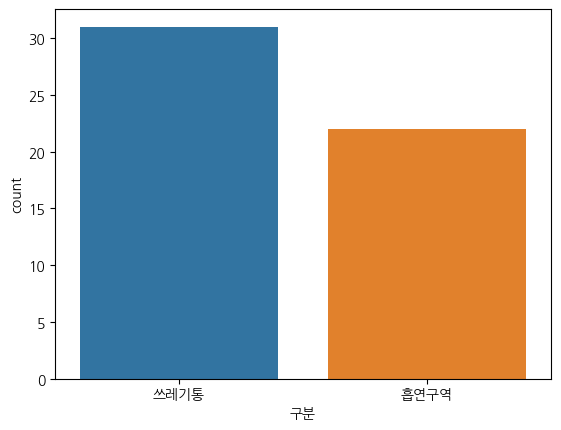

In [131]:
sns.countplot(data=melt_gb, x='구분')

In [140]:
# level=0 은 멀티인덱스(a,b)에서 a가 컬럼으로
melt_gb = melt_gb.reset_index(level=0)

ValueError: cannot insert 대로, already exists

In [218]:
x = melt_gb.index

In [222]:
y = melt_gb.values
y

array([['쓰레기통', 22],
       ['쓰레기통', 22],
       ['쓰레기통', 21],
       ['쓰레기통', 18],
       ['쓰레기통', 17],
       ['쓰레기통', 16],
       ['쓰레기통', 9],
       ['쓰레기통', 8],
       ['쓰레기통', 8],
       ['쓰레기통', 7],
       ['쓰레기통', 7],
       ['쓰레기통', 5],
       ['쓰레기통', 5],
       ['쓰레기통', 5],
       ['쓰레기통', 4],
       ['쓰레기통', 4],
       ['쓰레기통', 4],
       ['쓰레기통', 3],
       ['쓰레기통', 3],
       ['쓰레기통', 2],
       ['쓰레기통', 2],
       ['쓰레기통', 2],
       ['쓰레기통', 2],
       ['쓰레기통', 1],
       ['쓰레기통', 1],
       ['쓰레기통', 1],
       ['쓰레기통', 1],
       ['쓰레기통', 1],
       ['쓰레기통', 1],
       ['쓰레기통', 1],
       ['쓰레기통', 1],
       ['흡연구역', 10],
       ['흡연구역', 6],
       ['흡연구역', 6],
       ['흡연구역', 4],
       ['흡연구역', 4],
       ['흡연구역', 4],
       ['흡연구역', 4],
       ['흡연구역', 4],
       ['흡연구역', 4],
       ['흡연구역', 3],
       ['흡연구역', 2],
       ['흡연구역', 2],
       ['흡연구역', 2],
       ['흡연구역', 1],
       ['흡연구역', 1],
       ['흡연구역', 1],
       ['흡연구역', 1],
       ['흡연구역', 1],
       ['흡연구역

In [223]:
구분 = []
개수 = []
for i in range(len(y)):
    구분.append(y[i][0])
    개수.append(y[i][1])

In [236]:
df = {'구분':구분, '대로':x, '도로명개수':개수}
df = pd.DataFrame(df)
df

,구분,대로,도로명개수
0,쓰레기통,도림로,22
1,쓰레기통,영등포로,22
2,쓰레기통,당산로,21
3,쓰레기통,디지털로,18
4,쓰레기통,대림로,17
5,쓰레기통,영중로,16
6,쓰레기통,경인로,9
7,쓰레기통,신길로,8
8,쓰레기통,신풍로,8
9,쓰레기통,양평로,7


In [159]:
melt_gb1 = melt_gb[melt_gb['대로']>1]

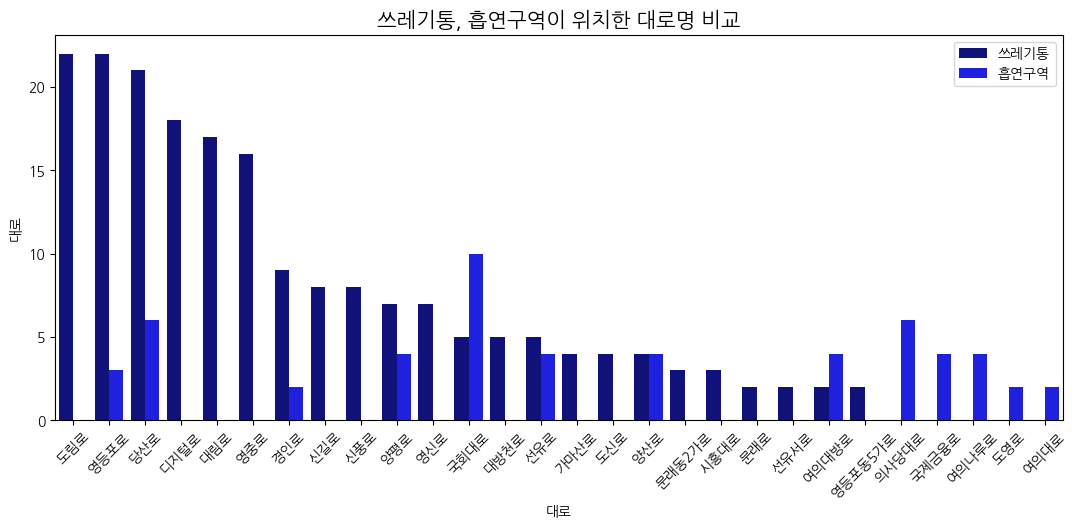

In [249]:
plt.figure(figsize=(13,5))
sns.barplot(data=melt_gb1, x=melt_gb1.index, y=melt_gb1['대로'], hue='구분', palette={'쓰레기통':'darkblue', '흡연구역':'blue'})
plt.title('쓰레기통, 흡연구역이 위치한 대로명 비교', fontsize=15)
plt.legend(loc='upper right')
plt.xticks(rotation=45);

In [186]:
a = df_melt[['구분', '대로']]
a

,구분,대로
0,쓰레기통,당산로
1,쓰레기통,국회대로
2,쓰레기통,당산로
3,쓰레기통,국회대로
4,쓰레기통,국회대로
...,...,...
263,흡연구역,국회대로
264,흡연구역,국회대로
265,흡연구역,의사당대로
266,흡연구역,여의나루로


In [230]:
이진 = []
for i in df['구분']:
    if i == '쓰레기통':
        이진.append(0)
    elif i == '흡연구역':
        이진.append(1)

In [239]:
df['쓰레기통, 흡연구역 구분'] = 이진

In [240]:
df

,구분,대로,도로명개수,"쓰레기통, 흡연구역 구분"
0,쓰레기통,도림로,22,0
1,쓰레기통,영등포로,22,0
2,쓰레기통,당산로,21,0
3,쓰레기통,디지털로,18,0
4,쓰레기통,대림로,17,0
5,쓰레기통,영중로,16,0
6,쓰레기통,경인로,9,0
7,쓰레기통,신길로,8,0
8,쓰레기통,신풍로,8,0
9,쓰레기통,양평로,7,0


In [241]:
corr = df.corr()
corr

,도로명개수,"쓰레기통, 흡연구역 구분"
도로명개수,1.000000,-0.320109
"쓰레기통, 흡연구역 구분",-0.320109,1.000000


In [265]:
df_1 = df[['구분', '대로', '도로명개수']]

## 검정 다른 방법

In [283]:
df_crosstab = pd.crosstab(df_1['구분'], df_1['대로'])
df_crosstab = pd.pivot_table(df_1, index='구분', columns='대로')
df_crosstab

도로명개수                                                    ...             \
대로     63로 가마산로  경인로 국제금융로  국회대로 노량진로   당산로   대림로 대방천로   도림로  ...  양평로 여의나루로   
구분                                                            ...              
쓰레기통   NaN  4.0  9.0   NaN   5.0  1.0  21.0  17.0  5.0  22.0  ...  7.0   NaN   
흡연구역   1.0  1.0  2.0   4.0  10.0  NaN   6.0   NaN  NaN   1.0  ...  4.0   4.0   

                                                     
대로   여의대로 여의대방로 영등포동5가로  영등포로  영신로   영중로  은행로 의사당대로  
구분                                                   
쓰레기통  NaN   2.0     2.0  22.0  7.0  16.0  NaN   NaN  
흡연구역  2.0   4.0     NaN   3.0  NaN   1.0  1.0   6.0  

[2 rows x 39 columns]

In [292]:
df_crosstab = df_crosstab.fillna(0)

In [293]:
rows = [row.to_list() for i, row in df_crosstab.iterrows()]
rows

[[0.0,
  4.0,
  9.0,
  0.0,
  5.0,
  1.0,
  21.0,
  17.0,
  5.0,
  22.0,
  1.0,
  4.0,
  0.0,
  18.0,
  1.0,
  1.0,
  3.0,
  1.0,
  1.0,
  2.0,
  0.0,
  1.0,
  1.0,
  5.0,
  2.0,
  3.0,
  8.0,
  8.0,
  4.0,
  7.0,
  0.0,
  0.0,
  2.0,
  2.0,
  22.0,
  7.0,
  16.0,
  0.0,
  0.0],
 [1.0,
  1.0,
  2.0,
  4.0,
  10.0,
  0.0,
  6.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  4.0,
  1.0,
  0.0,
  0.0,
  0.0,
  4.0,
  4.0,
  4.0,
  2.0,
  4.0,
  0.0,
  3.0,
  0.0,
  1.0,
  1.0,
  6.0]]

In [294]:
from scipy.stats import chi2_contingency

# 출력결과 : 카이제곱통계랑, p value, 자유도, 서로 독립일 때 기대(expected) 빈도의 row list
# p value 가 클수록 귀무가설 채택 (p_value>0.05)
# p value가 0에 가깝게 나왔기 때문에 귀무가설 기각 => 구분과 도로명은 독립이 아니다.
# H0 구분과 도로명은 독립이다.
# H1 구분과 도로명은 독립이 아니다.(연관이 있다.)
chi2_contingency(rows, correction=False)

(129.3228783041285,
 6.941814920003802e-12,
 38,
 array([[ 0.76119403,  3.80597015,  8.37313433,  3.04477612, 11.41791045,
          0.76119403, 20.55223881, 12.94029851,  3.80597015, 17.50746269,
          0.76119403,  3.80597015,  1.52238806, 13.70149254,  0.76119403,
          0.76119403,  2.28358209,  0.76119403,  0.76119403,  2.28358209,
          0.76119403,  0.76119403,  0.76119403,  6.85074627,  2.28358209,
          2.28358209,  6.08955224,  6.08955224,  6.08955224,  8.37313433,
          3.04477612,  1.52238806,  4.56716418,  1.52238806, 19.02985075,
          5.32835821, 12.94029851,  0.76119403,  4.56716418],
        [ 0.23880597,  1.19402985,  2.62686567,  0.95522388,  3.58208955,
          0.23880597,  6.44776119,  4.05970149,  1.19402985,  5.49253731,
          0.23880597,  1.19402985,  0.47761194,  4.29850746,  0.23880597,
          0.23880597,  0.71641791,  0.23880597,  0.23880597,  0.71641791,
          0.23880597,  0.23880597,  0.23880597,  2.14925373,  0.71641791,
 

In [302]:
# 크래머V - 명목변수간 상관관계 분석
# 0.6 이상이 되면 강한 연관관계가 있다고 본다.
x2 = chi2_contingency(rows, correction=False)[0]
n = np.sum(rows)
minDimension = min(np.array(rows).shape)-1

V = np.sqrt((x2/n) / minDimension)

print(V)

0.6946567881865215


## LabelEncoder

In [257]:
from sklearn import preprocessing
from scipy.stats import chi2_contingency

In [266]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in df_1.columns:
    data_encoded[i] = label.fit_transform(df_1[i])
    
data_encoded.head()

,구분,대로,도로명개수
0,0,9,14
1,0,34,14
2,0,6,13
3,0,13,12
4,0,7,11


In [268]:
crosstab = np.array(pd.crosstab(data_encoded['구분'], data_encoded['대로'], rownames=None, colnames=None))
crosstab

array([[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]], dtype=int64)

In [269]:
crosstab[0]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [270]:
chi2_contingency(crosstab[0])

ValueError: The internally computed table of expected frequencies has a zero element at (0,).

In [263]:
# 함수 정의 및 혼동행렬 생성
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab[0])
    obs = np.sum(crosstab)
    phi2 = stat / obs
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - (((k-1)*(r-1))/(obs-1)))
    rcorr = r - ((r-1)**2)/(obs-1)
    kcorr = k - ((k-1)**2)/(obs-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [301]:
x2 = chi2_contingency(rows, correction=False)[0]
n = np.sum(rows)
minDimension = min(np.array(rows).shape)-1

V = np.sqrt((x2/n) / minDimension)

print(V)

0.6946567881865215


In [264]:
rows = []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2])
        col.append(round(cramers, 2))
    rows.append(col)

ValueError: The internally computed table of expected frequencies has a zero element at (1,).

## 수치변수 시각화

In [126]:
corr = yeongdeung_m.corr()
corr

,쓰레기통위도,쓰레기통경도,흡연구역위도,흡연구역경도
쓰레기통위도,1.000000,-0.204524,-0.121813,0.044156
쓰레기통경도,-0.204524,1.000000,0.292176,-0.107884
흡연구역위도,-0.121813,0.292176,1.000000,-0.070595
흡연구역경도,0.044156,-0.107884,-0.070595,1.000000


<AxesSubplot:>

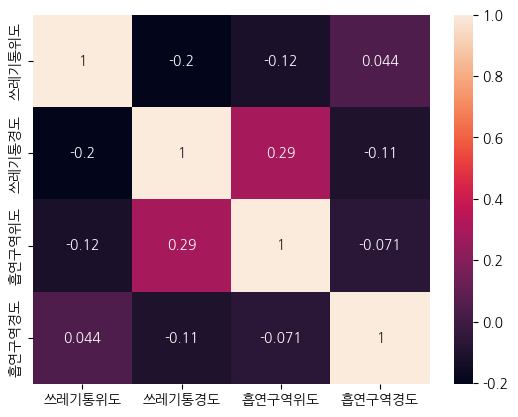

In [127]:
sns.heatmap(yeongdeung_m.corr(), annot=True)